# Modifier des images avec un script

Les lignes suivantes permettent d'importer le module PIL, pour Python Image Library, qui permet de traiter de manière simple des fichiers images, et un certain nombre d'autres modules utilisés pour afficher les images dans le notebook et les manipuler interactivement.  

In [3]:
import PIL.Image as pl
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

Les commandes de la librairie PIL que nous allons utiliser : 

* `pl.new(codage, taille)` : créé une nouvelle image, en précisant sont encodage (pour nous RGB) et sa définition.
* `image.size` : renvoie un couple (largeur, hauteur) qui donne la définition de l'image.
* `image.getpixel((x,y))` : renvoie sous la forme d'un triplet (r, g, b) le pixel situé sur la colonne x et la ligne y. 
* `image.putpixel((x,y), (r, g, b))` : place dans l'image, sur la colonne x et la ligne y, le pixel (r, g, b). 

Cette ligne permet de préciser le chemin du dossier de travail, celui qui contient les images à modifier et dans lequel on enregistrera les images produites.

Dans la suite, nous allons travailler avec une image de la Joconde, libre de droits.

In [30]:
chemin = '/Users/nicolasvigot/Google Drive LAK/Mutualisation/PFCP/SNT/6. Photographie numérique/Images/'

## L'image originale

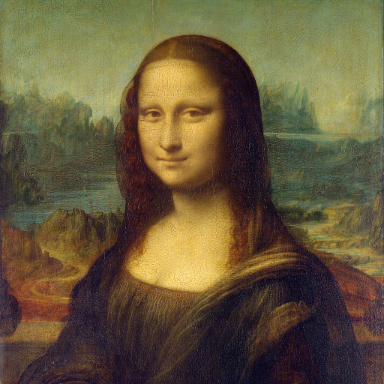

In [7]:
img = pl.open('Joconde_384.jpg')
T = np.array(img)
plt.figure(figsize=(10,10))
plt.imshow(T)
img

In [31]:
def affichage(fonction, seuil = 0):
    img = pl.open(chemin + 'Joconde_384.jpg')
    img2 = fonction(img, seuil)
    T = np.array(img2)
    plt.figure(figsize=(10,10))
    plt.imshow(T)
    img2.save(chemin + 'Joconde_modifiée.jpg')
    return None

On pouvait également utiliser pour l'affichage un <code>img2.show()</code>, qui aurait fait appel à un afficheur externe, ou <code>Image(fichier)</code> du module <code>display</code>, qui affiche dans le notebook le fichier image. 

## Les trois canaux de l'image

In [55]:
def canaux(image):
    rouge, vert, bleu = pl.new('RGB', image.size), pl.new('RGB', image.size), pl.new('RGB', image.size)
    largeur, hauteur = image.size
    for x in range(largeur):
        for y in range(hauteur):
            (r, v, b) = image.getpixel((x,y))
            rouge.putpixel((x,y), (r, 0, 0))
            vert.putpixel((x,y), (0, v, 0))
            bleu.putpixel((x,y), (0, 0, b))
    return rouge, vert, bleu

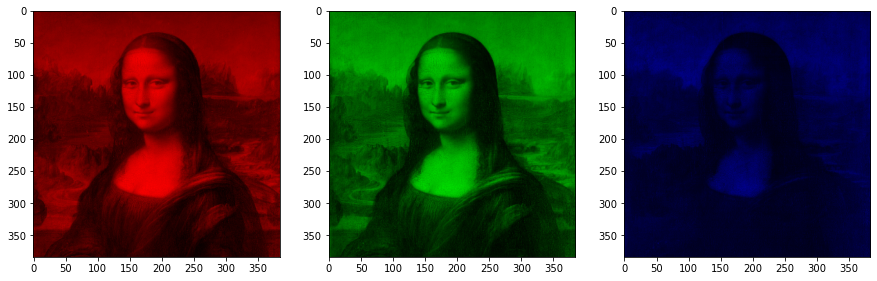

In [56]:
joconde = pl.open(chemin + 'Joconde_384.jpg')
joconde_2 = canaux(joconde)
figure, axes = plt.subplots(1, 3, figsize=(15,5));
for k in range(3):
    T = np.array(joconde_2[k])
    axes[k].imshow(T);

## 1. Négatif

La fonction suivante permet de créer le **négatif** d'une image.

**Le principe** : chaque pixel de l'image est codé en RVB par un triplet d'entiers (r, v, b), chacun étant compris entre 0 et 255. Le script va parcourir l'image entrée pixel par pixel, et le remplacer par son pixel complémentaire (255-r, 255-v, 255-b). 

In [32]:
def negatif(image, seuil=0):
    image2 = pl.new("RGB", image.size)
    largeur, hauteur = image.size
    for x in range(largeur):
        for y in range(hauteur):
            (r, v, b) = image.getpixel((x, y))
            image2.putpixel((x, y), (255-r, 255-v, 255-b))
    return image2

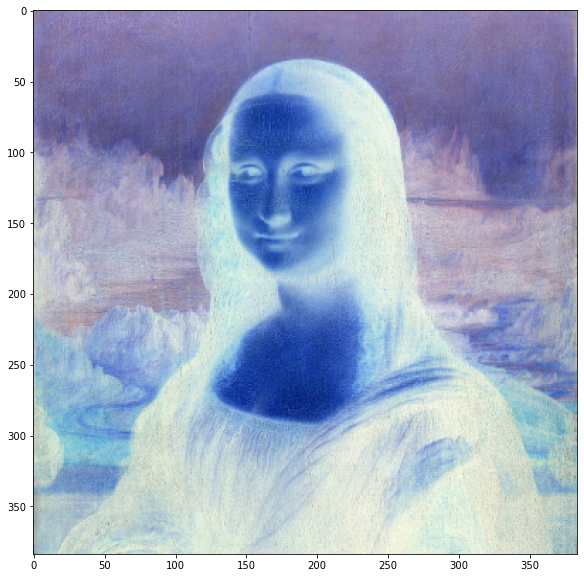

In [33]:
affichage(negatif)

## 2. Niveaux de gris

Les fonctions suivantes permettent de créer, à partir d'une image en couleurs, une image en **niveaux de gris**.

**Le principe** : chaque pixel (r, v, b) de l'image originale va être remplacé par un pixel (m, m, m), où est m est la moyenne des trois nombres r, v et b. Ce pixel apparaîtra donc en gris.

In [34]:
def moyenne(r, v, b):
    return (r + v + b) // 3

In [35]:
def niveauxGris(image, seuil = 0):
    image2 = pl.new("RGB", image.size)
    largeur, hauteur = image.size
    for x in range(largeur):
        for y in range(hauteur):
            (r, v, b) = image.getpixel((x, y))
            m = moyenne(r, v, b)
            image2.putpixel((x, y), (m, m, m))
    return image2

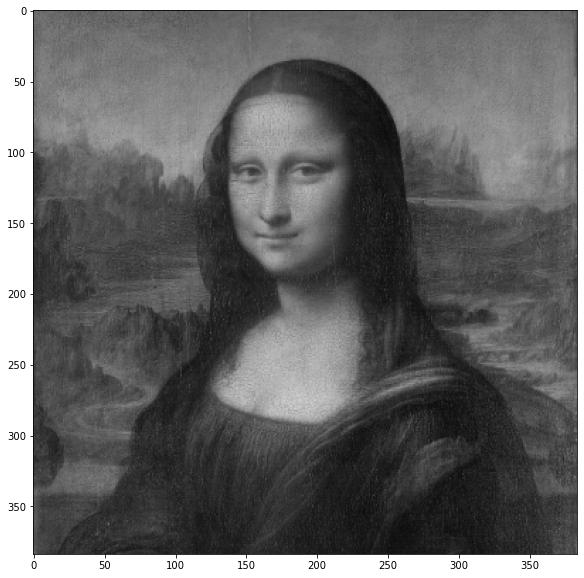

In [36]:
affichage(niveauxGris)

## 3. Noir et blanc

La fonction suivante permet de créer une copie en noir et blanc de l'image d'origine (vous ferez la différence avec le script précédent, et entre « noir et blanc » et « niveaux de gris »).

**Le principe** : pour chaque pixel (r, v, b) de l'image d'origine, on vérifie si le plus grand des trois nombres r, v, ou b est supérieur à un seuil. Si oui, ce pixel sera remplacé dans l'image par un pixel blanc (255, 255, 255). Sinon, il sera remplacé par un pixel noir (0, 0, 0).

Vous pouvez essayer diverses valeurs du seuil, et ainsi observer son influence sur l'image produite. 

In [37]:
def noirEtBlanc(image, seuil):
    image2 = pl.new("RGB", image.size)
    largeur, hauteur = image.size
    for x in range(largeur):
        for y in range(hauteur):
            (r, v, b) = image.getpixel((x,y))
            if (max((r, v, b)) > seuil):
                image2.putpixel((x, y), (255, 255, 255))
            else:
                image2.putpixel((x,y), (0, 0, 0))
    return image2

In [38]:
wdg.interact(affichage, fonction=wdg.fixed(noirEtBlanc), 
             seuil=wdg.IntSlider(min=50, max=200, step=10, value=130));

## 4. Détection des bords

Ce dernier script enfin est légèrement plus compliqué. Il vise à detecter les **bords** des objets d'une image.

**Le principe** : un pixel situé sur le bord d'un objet doit avoir une couleur très différente de celle des pixels qui l'entourent. Avec deux pixels, on calcule la *distance* entre leurs couleurs à l'aide de la formule : 
$$\sqrt{(r_1-r_2)^2 + (g_1-g_2)^2 + (b_1-b_2)^2}$$
Pour chaque pixel de l'image d'origine, on calcule la distance entre sa couleur et celle des huits pixels qui l'entourent. On ajoute toutes ces distances pour obtenir un écart, et on compare cet écart à un seuil. S'il l'écart est supérieur au seuil, on décide que le pixel appartient au bord d'un objet, et on le remplace dans l'image d'origine par un pixel ici orange. Si l'écart est inférieur au seuil, le pixel n'est pas sur le bord d'un objet, et on le remplace par un pixel ici gris. 

Ici encore, il est possible de jouer sur le seuil pour affiner la sensibilité de la détection des bords.

In [39]:
def distance(pixel1, pixel2):
    return ((pixel1[0]-pixel2[0])**2 + (pixel1[1]-pixel2[1])**2 + (pixel1[2]-pixel2[2])**2)

In [40]:
def detectBords(image, seuil):
    seuil = int(seuil)
    image2 = pl.new("RGB", image.size)
    largeur, hauteur = image.size
    for x in range(1, largeur-1):
        for y in range(1, hauteur-1):
            ecart = 0
            pix = image.getpixel((x, y))
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    pix2 = image.getpixel((x+i, y+j))
                    ecart += distance(pix, pix2)
            if ecart > seuil:
                image2.putpixel((x, y), (255, 140, 0))
            else:
                image2.putpixel((x, y), (200, 200, 200))
    return image2

In [41]:
wdg.interact_manual(affichage, fonction = wdg.fixed(detectBords), 
                    seuil = wdg.IntSlider(min=1000, max=10000, step=500, value=4000));